In [1]:
# things we will need to do stuff in this notebook
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from matplotlib.colors import LogNorm
from matplotlib.patches import Ellipse

# two useful data viz libraries
import matplotlib.pyplot as plt
import seaborn as sns

# For finding na values
import missingno as msno

# Make it so more values of the DataFrames and Series are visable
from IPython.display import display

# # Assuming your series is named 'series_data'
# # Set the maximum number of displayed rows and columns to None to display all data
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', None)

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
df = pd.read_csv("owid-covid-data.csv", low_memory=False)
df

iso_code continent     location        date  total_cases  new_cases  \
0           AFG      Asia  Afghanistan  2020-01-05          NaN        0.0   
1           AFG      Asia  Afghanistan  2020-01-06          NaN        0.0   
2           AFG      Asia  Afghanistan  2020-01-07          NaN        0.0   
3           AFG      Asia  Afghanistan  2020-01-08          NaN        0.0   
4           AFG      Asia  Afghanistan  2020-01-09          NaN        0.0   
...         ...       ...          ...         ...          ...        ...   
376879      ZWE    Africa     Zimbabwe  2024-01-31     266265.0        0.0   
376880      ZWE    Africa     Zimbabwe  2024-02-01     266265.0        0.0   
376881      ZWE    Africa     Zimbabwe  2024-02-02     266265.0        0.0   
376882      ZWE    Africa     Zimbabwe  2024-02-03     266265.0        0.0   
376883      ZWE    Africa     Zimbabwe  2024-02-04     266265.0        0.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
0                      NaN           NaN         0.0                  NaN   
1                      NaN           NaN         0.0                  NaN   
2                      NaN           NaN         0.0                  NaN   
3                      NaN           NaN         0.0                  NaN   
4                      NaN           NaN         0.0                  NaN   
...                    ...           ...         ...                  ...   
376879               4.429        5737.0         0.0                  0.0   
376880               4.429        5737.0         0.0                  0.0   
376881               4.429        5737.0         0.0                  0.0   
376882               4.429        5737.0         0.0                  0.0   
376883               0.000        5737.0         0.0                  0.0   

        total_cases_per_million  new_cases_per_million  \
0                           NaN                    0.0   
1                           NaN                    0.0   
2                           NaN                    0.0   
3                           NaN                    0.0   
4                           NaN                    0.0   
...                         ...                    ...   
376879                16314.719                    0.0   
376880                16314.719                    0.0   
376881                16314.719                    0.0   
376882                16314.719                    0.0   
376883                16314.719                    0.0   

        new_cases_smoothed_per_million  total_deaths_per_million  \
0                                  NaN                       NaN   
1                                  NaN                       NaN   
2                                  NaN                       NaN   
3                                  NaN                       NaN   
4                                  NaN                       NaN   
...                                ...                       ...   
376879                           0.271                    351.52   
376880                           0.271                    351.52   
376881                           0.271                    351.52   
376882                           0.271                    351.52   
376883                           0.000                    351.52   

        new_deaths_per_million  new_deaths_smoothed_per_million  \
0                          0.0                              NaN   
1                          0.0                              NaN   
2                          0.0                              NaN   
3                          0.0                              NaN   
4                          0.0                              NaN   
...                        ...                              ...   
376879                     0.0                              0.0   
376880                     0.0                              0.0   
376881                     0

## Missing Data Analysis

In [3]:
# msno.matrix(df);

In [4]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [5]:
# msno.bar(df);

In [6]:
# msno.heatmap(df);

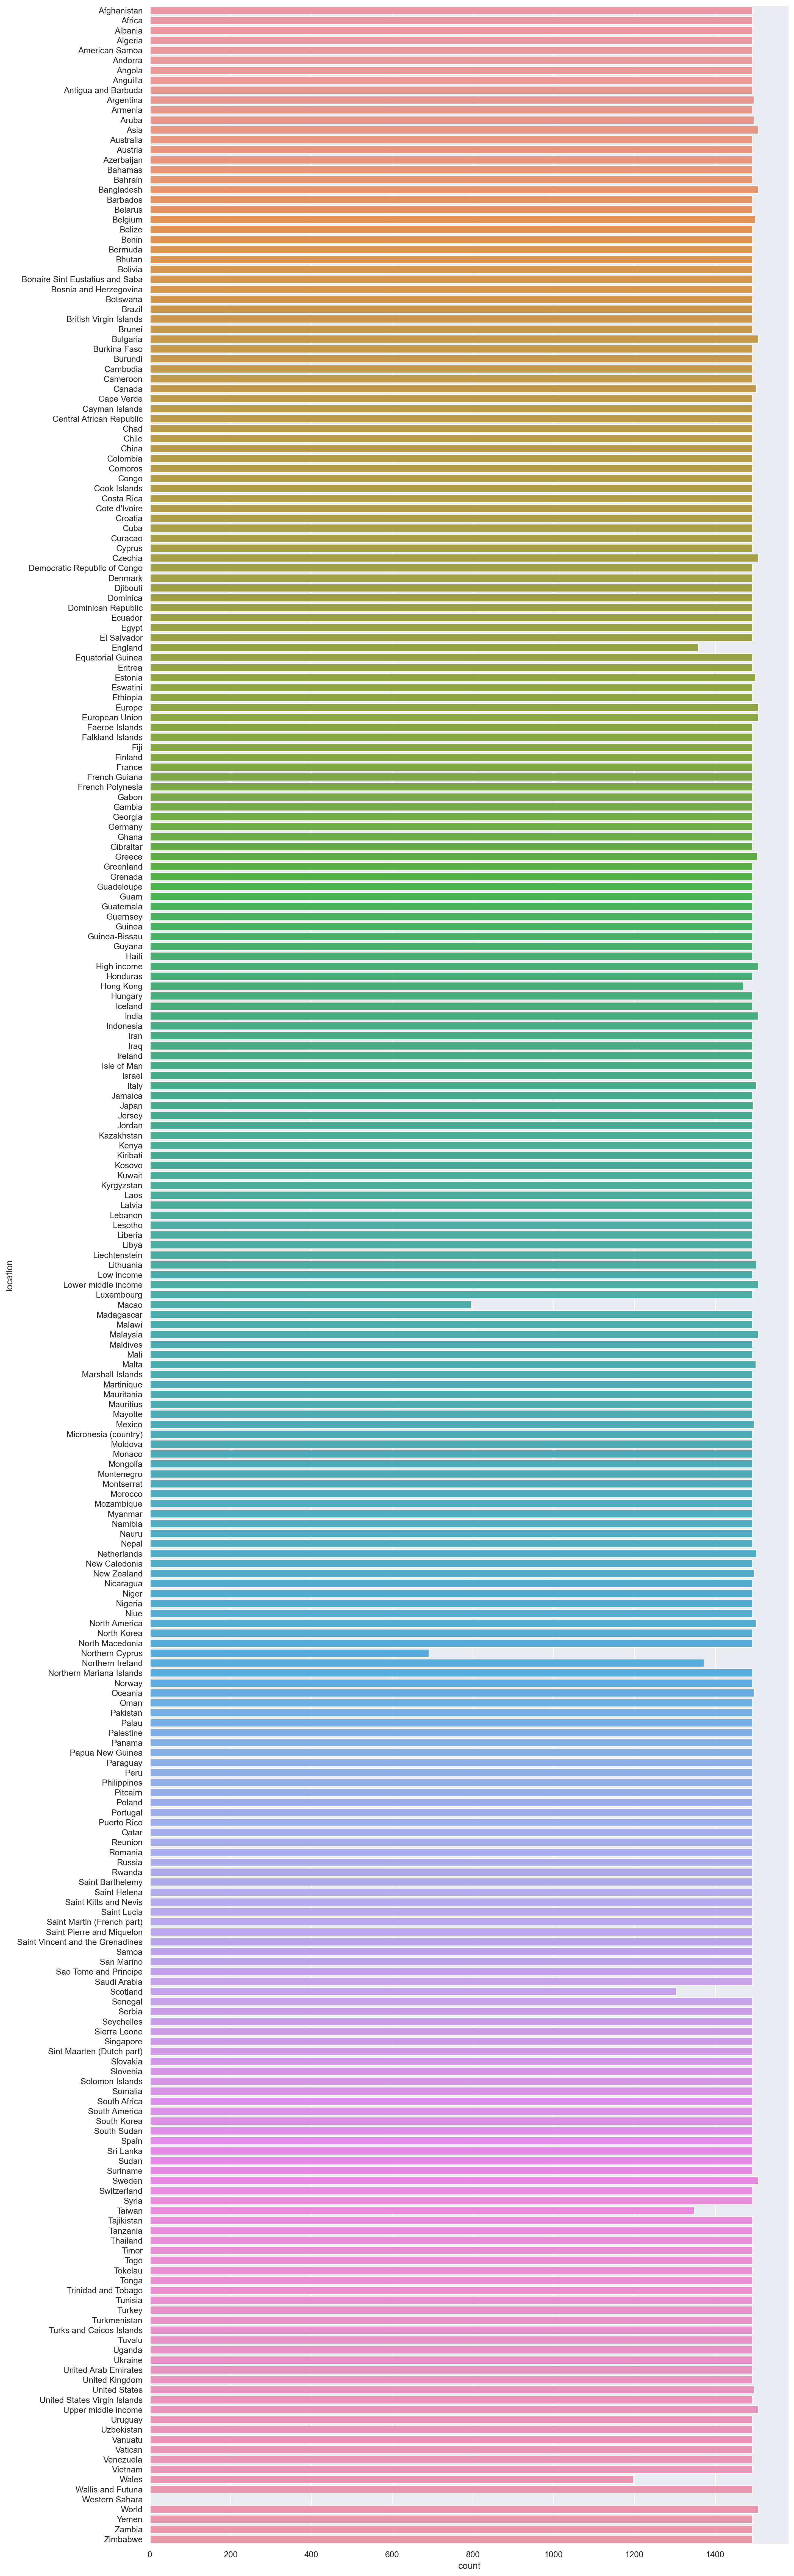

In [7]:
sns.set(rc={'figure.figsize':(15,60)})
sns.countplot(data=df, y='location');

In [8]:
df['new_cases']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
376879    0.0
376880    0.0
376881    0.0
376882    0.0
376883    0.0
Name: new_cases, Length: 376884, dtype: float64

/Users/oceanopal/anaconda3/envs/COGS118B_WI24/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/oceanopal/anaconda3/envs/COGS118B_WI24/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


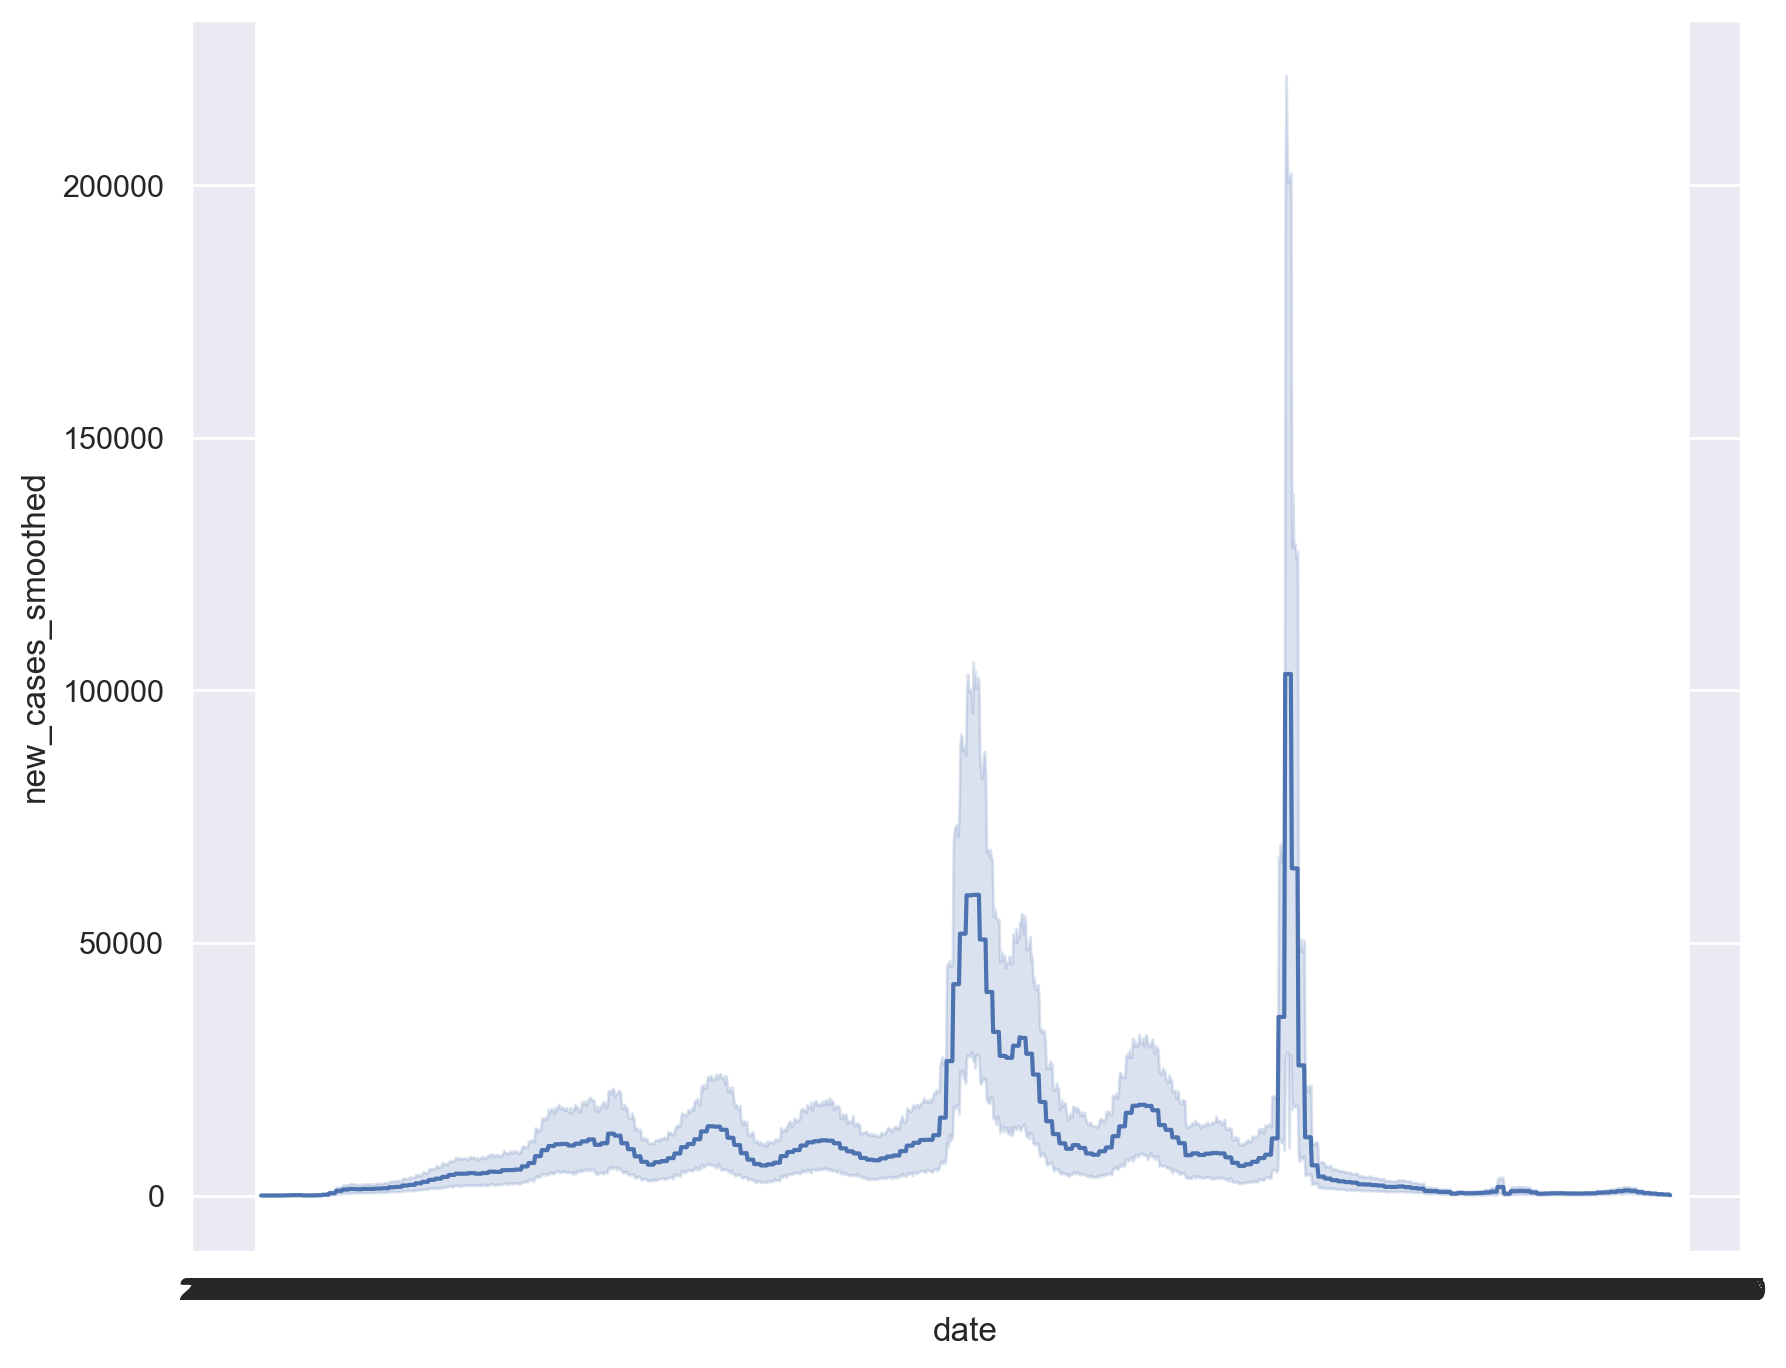

In [9]:
sns.set(rc={'figure.figsize':(10,8)});
sns.lineplot(data=df, x="date", y="new_cases_smoothed");

## United States Subsection

In [10]:
df_us = df[df['location']=='United States']
df_us

iso_code      continent       location        date  total_cases  \
354763      USA  North America  United States  2020-01-05          NaN   
354764      USA  North America  United States  2020-01-06          NaN   
354765      USA  North America  United States  2020-01-07          NaN   
354766      USA  North America  United States  2020-01-08          NaN   
354767      USA  North America  United States  2020-01-09          NaN   
...         ...            ...            ...         ...          ...   
356254      USA  North America  United States  2024-02-04  103436829.0   
356255      USA  North America  United States  2024-02-05          NaN   
356256      USA  North America  United States  2024-02-06          NaN   
356257      USA  North America  United States  2024-02-07          NaN   
356258      USA  North America  United States  2024-02-08          NaN   

        new_cases  new_cases_smoothed  total_deaths  new_deaths  \
354763        0.0                 NaN           NaN         0.0   
354764        0.0                 NaN           NaN         0.0   
354765        0.0                 NaN           NaN         0.0   
354766        0.0                 NaN           NaN         0.0   
354767        0.0                 NaN           NaN         0.0   
...           ...                 ...           ...         ...   
356254        NaN                 NaN     1170784.0         NaN   
356255        NaN                 NaN           NaN         NaN   
356256        NaN                 NaN           NaN         NaN   
356257        NaN                 NaN           NaN         NaN   
356258        NaN                 NaN           NaN         NaN   

        new_deaths_smoothed  total_cases_per_million  new_cases_per_million  \
354763                  NaN                      NaN                    0.0   
354764                  NaN                      NaN                    0.0   
354765                  NaN                      NaN                    0.0   
354766                  NaN                      NaN                    0.0   
354767                  NaN                      NaN                    0.0   
...                     ...                      ...                    ...   
356254                  NaN                305763.91                    NaN   
356255                  NaN                      NaN                    NaN   
356256                  NaN                      NaN                    NaN   
356257                  NaN                      NaN                    NaN   
356258                  NaN                      NaN                    NaN   

        new_cases_smoothed_per_million  total_deaths_per_million  \
354763                             NaN                       NaN   
354764                             NaN                       NaN   
354765                             NaN                       NaN   
354766                             NaN                       NaN   
354767                             NaN                       NaN   
...                                ...                       ...   
356254                             NaN                   3460.89   
356255                             NaN                       NaN   
356256                             NaN                       NaN   
356257                             NaN                       NaN   
356258                             NaN                       NaN   

        new_deaths_per_million  new_deaths_smoothed_per_million  \
354763                     0.0                              NaN   
354764                     0.0                              NaN   
354765                     0.0                              NaN   
354766                     0.0                              NaN   
354767                     0.0                              NaN   
...                        ...                              ...   
356254                     NaN                              NaN   
356255     

/Users/oceanopal/anaconda3/envs/COGS118B_WI24/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/oceanopal/anaconda3/envs/COGS118B_WI24/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


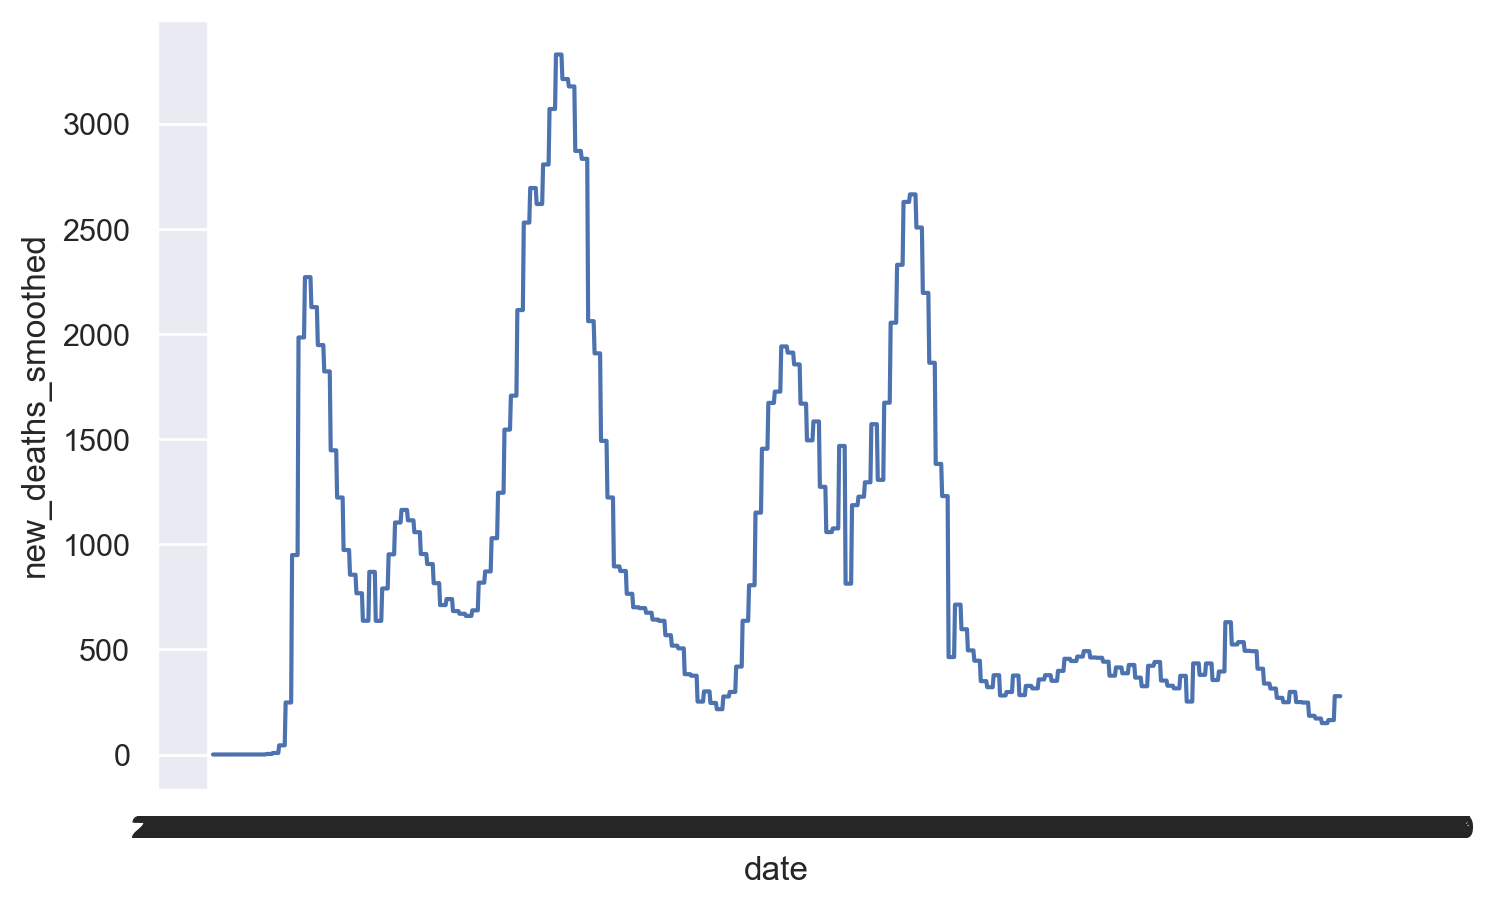

In [11]:
sns.set(rc={'figure.figsize':(8,5)});
sns.lineplot(data=df_us, x="date", y="new_deaths_smoothed");

## Graph of Deaths

In [12]:
def death_graph(country):
    df_new = df[df['location'] == country]
    sns.set(rc={'figure.figsize':(8,5)});
    sns.lineplot(data=df_new, x="date", y="new_deaths_smoothed");

/Users/oceanopal/anaconda3/envs/COGS118B_WI24/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/oceanopal/anaconda3/envs/COGS118B_WI24/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


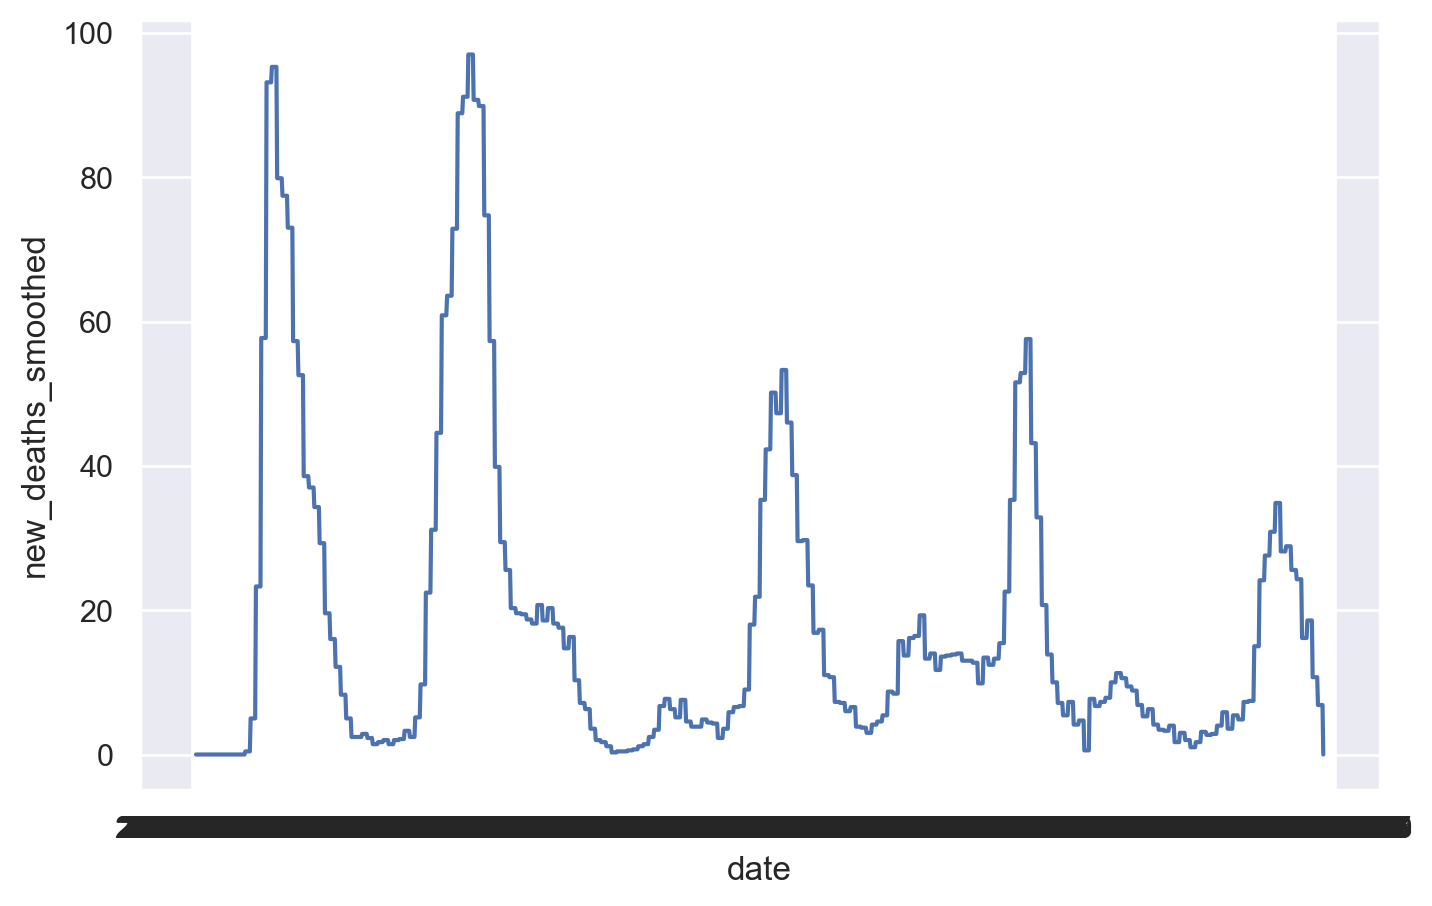

In [13]:
death_graph('Sweden')

# Function Research

In [14]:
np.set_printoptions(threshold=np.inf)
df['date'].unique()

array(['2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
       '2020-01-09', '2020-01-10', '2020-01-11', '2020-01-12',
       '2020-01-13', '2020-01-14', '2020-01-15', '2020-01-16',
       '2020-01-17', '2020-01-18', '2020-01-19', '2020-01-20',
       '2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24',
       '2020-01-25', '2020-01-26', '2020-01-27', '2020-01-28',
       '2020-01-29', '2020-01-30', '2020-01-31', '2020-02-01',
       '2020-02-02', '2020-02-03', '2020-02-04', '2020-02-05',
       '2020-02-06', '2020-02-07', '2020-02-08', '2020-02-09',
       '2020-02-10', '2020-02-11', '2020-02-12', '2020-02-13',
       '2020-02-14', '2020-02-15', '2020-02-16', '2020-02-17',
       '2020-02-18', '2020-02-19', '2020-02-20', '2020-02-21',
       '2020-02-22', '2020-02-23', '2020-02-24', '2020-02-25',
       '2020-02-26', '2020-02-27', '2020-02-28', '2020-02-29',
       '2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04',
       '2020-03-05', '2020-03-06', '2020-03-07', '2020-

In [15]:
date_one = '2020-03-16'
df_date_one = df[df['date'] == date_one]
df_date_one

iso_code continent           location        date  total_cases  \
71           AFG      Asia        Afghanistan  2020-03-16          7.0   
1563    OWID_AFR       NaN             Africa  2020-03-16        314.0   
3055         ALB    Europe            Albania  2020-03-16         33.0   
4547         DZA    Africa            Algeria  2020-03-16         37.0   
6039         ASM   Oceania     American Samoa  2020-03-16          NaN   
...          ...       ...                ...         ...          ...   
369479       WLF   Oceania  Wallis and Futuna  2020-03-16          NaN   
370972  OWID_WRL       NaN              World  2020-03-16     167154.0   
372479       YEM      Asia              Yemen  2020-03-16          NaN   
373971       ZMB    Africa             Zambia  2020-03-16          NaN   
375463       ZWE    Africa           Zimbabwe  2020-03-16          NaN   

        new_cases  new_cases_smoothed  total_deaths  new_deaths  \
71            0.0               0.857           NaN         0.0   
1563          0.0              33.429           9.0         0.0   
3055          0.0               4.714           1.0         0.0   
4547          0.0               2.571           NaN         0.0   
6039          0.0               0.000           NaN         0.0   
...           ...                 ...           ...         ...   
369479        0.0               0.000           NaN         0.0   
370972        0.0            8633.429        6289.0         0.0   
372479        0.0               0.000           NaN         0.0   
373971        0.0               0.000           NaN         0.0   
375463        0.0               0.000           5.0         0.0   

        new_deaths_smoothed  total_cases_per_million  new_cases_per_million  \
71                    0.000                    0.170                    0.0   
1563                  0.571                    0.220                    0.0   
3055                  0.143                   11.610                    0.0   
4547                  0.000                    0.824                    0.0   
6039                  0.000                      NaN                    0.0   
...                     ...                      ...                    ...   
369479                0.000                      NaN                    0.0   
370972              379.143                   20.959                    0.0   
372479                0.000                      NaN                    0.0   
373971                0.000                      NaN                    0.0   
375463                0.000                      NaN                    0.0   

        new_cases_smoothed_per_million  total_deaths_per_million  \
71                               0.021                       NaN   
1563                             0.023                     0.006   
3055                             1.659                     0.352   
4547                             0.057                       NaN   
6039                             0.000                       NaN   
...                                ...                       ...   
369479                           0.000                       NaN   
370972                           1.083                     0.789   
372479                           0.000                       NaN   
373971                           0.000                       NaN   
375463                           0.000                     0.306   

        new_deaths_per_million  new_deaths_smoothed_per_million  \
71                         0.0                            0.000   
1563                       0.0                            0.000   
3055                       0.0                            0.050   
4547                       0.0                            0.000   
6039                       0.0                            0.000   
...                        ...                              ...   
369479                     0.0                            0.000   
370972      

In [16]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

# Function to get all the values from a date

In [17]:
def clean_data_for_date(df, date):
    """
    Cleans the DataFrame by finding the data from a specified date, indexing by the location 
    and selecting only certain columns
    
    Args:
    df (pd.DataFrame): Input DataFrame.
    date (string): Formatted like YYYY-MM-DD.
    
    Returns:
    pd.DataFrame: Cleaned up DataFrame.
    """
    df = df[df['date'] == date]
    df = df.set_index('location')[
        [
            'total_cases_per_million', 
            'total_deaths_per_million', 
            'reproduction_rate', 
            'icu_patients_per_million', 
            'hosp_patients_per_million',
            'total_tests_per_thousand',
            'new_tests_per_thousand',
            'positive_rate',
            'tests_per_case',
            'total_vaccinations_per_hundred',
            'people_vaccinated_per_hundred',
            'people_fully_vaccinated_per_hundred',
            'total_boosters_per_hundred',
            'stringency_index',
            'population_density',
            'extreme_poverty',
            'cardiovasc_death_rate',
            'handwashing_facilities',
            'hospital_beds_per_thousand',
            'life_expectancy',
            'human_development_index',
            'population'
        ]
    ]
    df = df.drop('World')
    return df[df.isna().sum(axis=1) <= 12]

# Normalize Function

In [18]:
def normalize_columns(df):
    """
    Normalize each column in the DataFrame by dividing each value by the maximum value in that column.
    
    Args:
    df (pd.DataFrame): Input DataFrame.
    
    Returns:
    pd.DataFrame: Normalized DataFrame.
    """
    max_values = df.max()  # Get maximum value for each column
    normalized_df = df.copy()  # Create a copy of the original DataFrame
    
    for column in df.columns:
        normalized_df[column] = df[column] / max_values[column]  # Normalize each column
        
    return normalized_df

In [19]:
def normalize_columns_zscore(df):
    """
    Normalize each column in the DataFrame by calculating the z-score.
    
    Args:
    df (pd.DataFrame): Input DataFrame.
    
    Returns:
    pd.DataFrame: Normalized DataFrame.
    """
    normalized_df = df.copy()  # Create a copy of the original DataFrame
    
    for column in df.columns:
        mean = df[column].mean()
        std = df[column].std()
        normalized_df[column] = (df[column] - mean) / std  # Calculate z-score for each column
        
    return normalized_df

In [20]:
df_loc = normalize_columns_zscore(clean_data_for_date(df, '2020-07-01')).fillna(0)
df_loc

total_cases_per_million  total_deaths_per_million  \
location                                                         
Afghanistan                -0.305434                 -0.347483   
Albania                    -0.290543                 -0.342040   
Algeria                    -0.431303                 -0.331442   
Angola                     -0.509079                 -0.455140   
Argentina                  -0.065238                  0.035534   
...                              ...                       ...   
Venezuela                  -0.464439                 -0.447660   
Vietnam                    -0.510091                  0.000000   
Yemen                      -0.502047                 -0.400690   
Zambia                     -0.489767                 -0.449261   
Zimbabwe                   -0.501492                 -0.453014   

             reproduction_rate  icu_patients_per_million  \
location                                                   
Afghanistan          -0.625254                  0.000000   
Albania               0.425834                  0.000000   
Algeria               1.272543                  0.000000   
Angola                0.805393                  0.000000   
Argentina             0.396637                  0.231284   
...                        ...                       ...   
Venezuela             0.717802                  0.000000   
Vietnam              -2.026703                  0.000000   
Yemen                -0.158104                  0.000000   
Zambia               -0.888025                  0.000000   
Zimbabwe              1.038968                  0.000000   

             hosp_patients_per_million  total_tests_per_thousand  \
location                                                           
Afghanistan                        0.0                  0.000000   
Albania                            0.0                 -0.589456   
Algeria                            0.0                  0.000000   
Angola                             0.0                  0.000000   
Argentina                          0.0                 -0.563290   
...                                ...                       ...   
Venezuela                          0.0                  0.000000   
Vietnam                            0.0                  0.000000   
Yemen                              0.0                  0.000000   
Zambia                             0.0                 -0.664191   
Zimbabwe                           0.0                 -0.677619   

             new_tests_per_thousand  positive_rate  tests_per_case  \
location                                                             
Afghanistan                0.000000       0.000000        0.000000   
Albania                   -0.453313       1.009453       -0.116710   
Algeria                    0.000000       0.000000        0.000000   
Angola                     0.000000       0.000000        0.000000   
Argentina                 -0.370415       1.897900       -0.116895   
...                             ...            ...             ...   
Venezuela                  0.000000       0.000000        0.000000   
Vietnam                    0.000000       0.000000        0.000000   
Yemen                      0.000000       0.000000        0.000000   
Zambia                    -0.450673      -0.479046       -0.113513   
Zimbabwe                  -0.490274      -0.488349       -0.113369   

             total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
location                                                                     
Afghanistan                             0.0                            0.0   
Albania                                 0.0                            0.0   
Algeria                                 0.0                            0.0   
Angola                                  0.0                            0.0   
Argentina                               0.0                            0.0   
...                            

# t-SNE Research

In [21]:
import plotly.express as px

In [22]:
# Taken from A4
def plot_components(components,x='pc1',y='pc2'):
    sns.set(rc={'figure.figsize':(24,16)});
    sns.scatterplot(data=components, x=x, y=y)
    sns.despine()
    ax = plt.gca()
    for company in components.index:
        ax.annotate(company,xy=components.loc[company])

In [23]:
def plot_components_plotly(components,x='pc1',y='pc2'):
    fig = px.scatter(components, x=x, y=y, color=components.index, width=1200, height=800)
    fig.show()

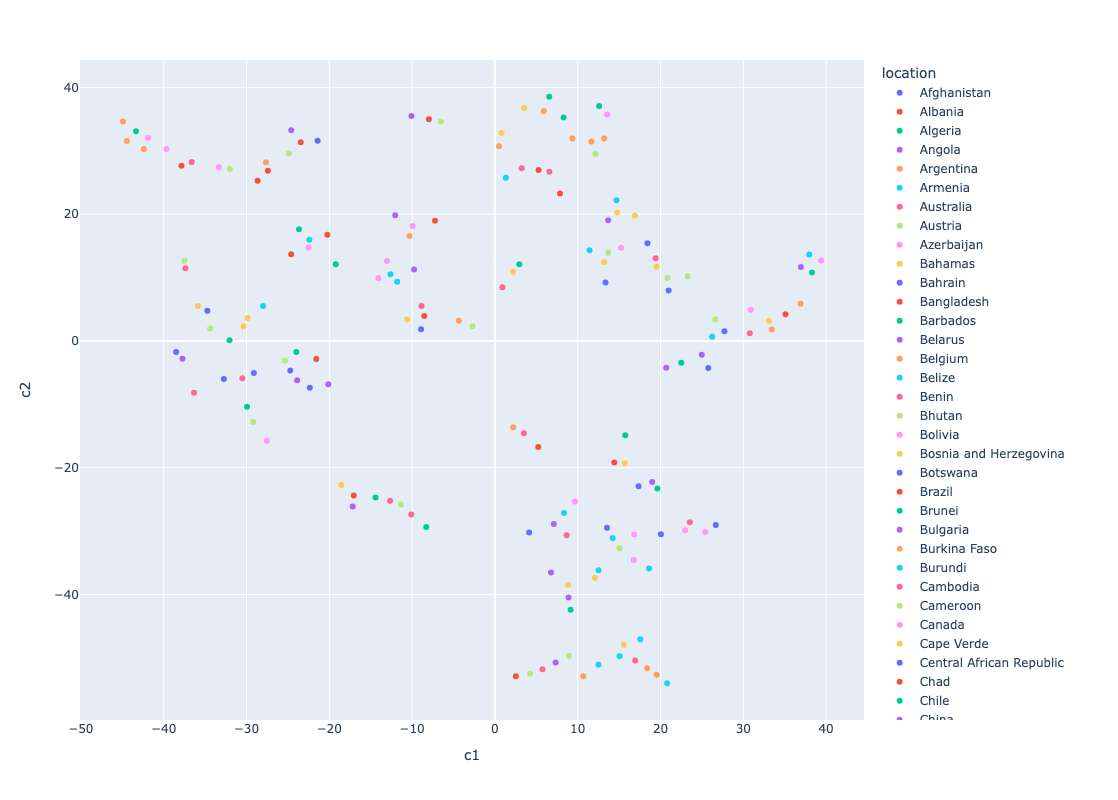

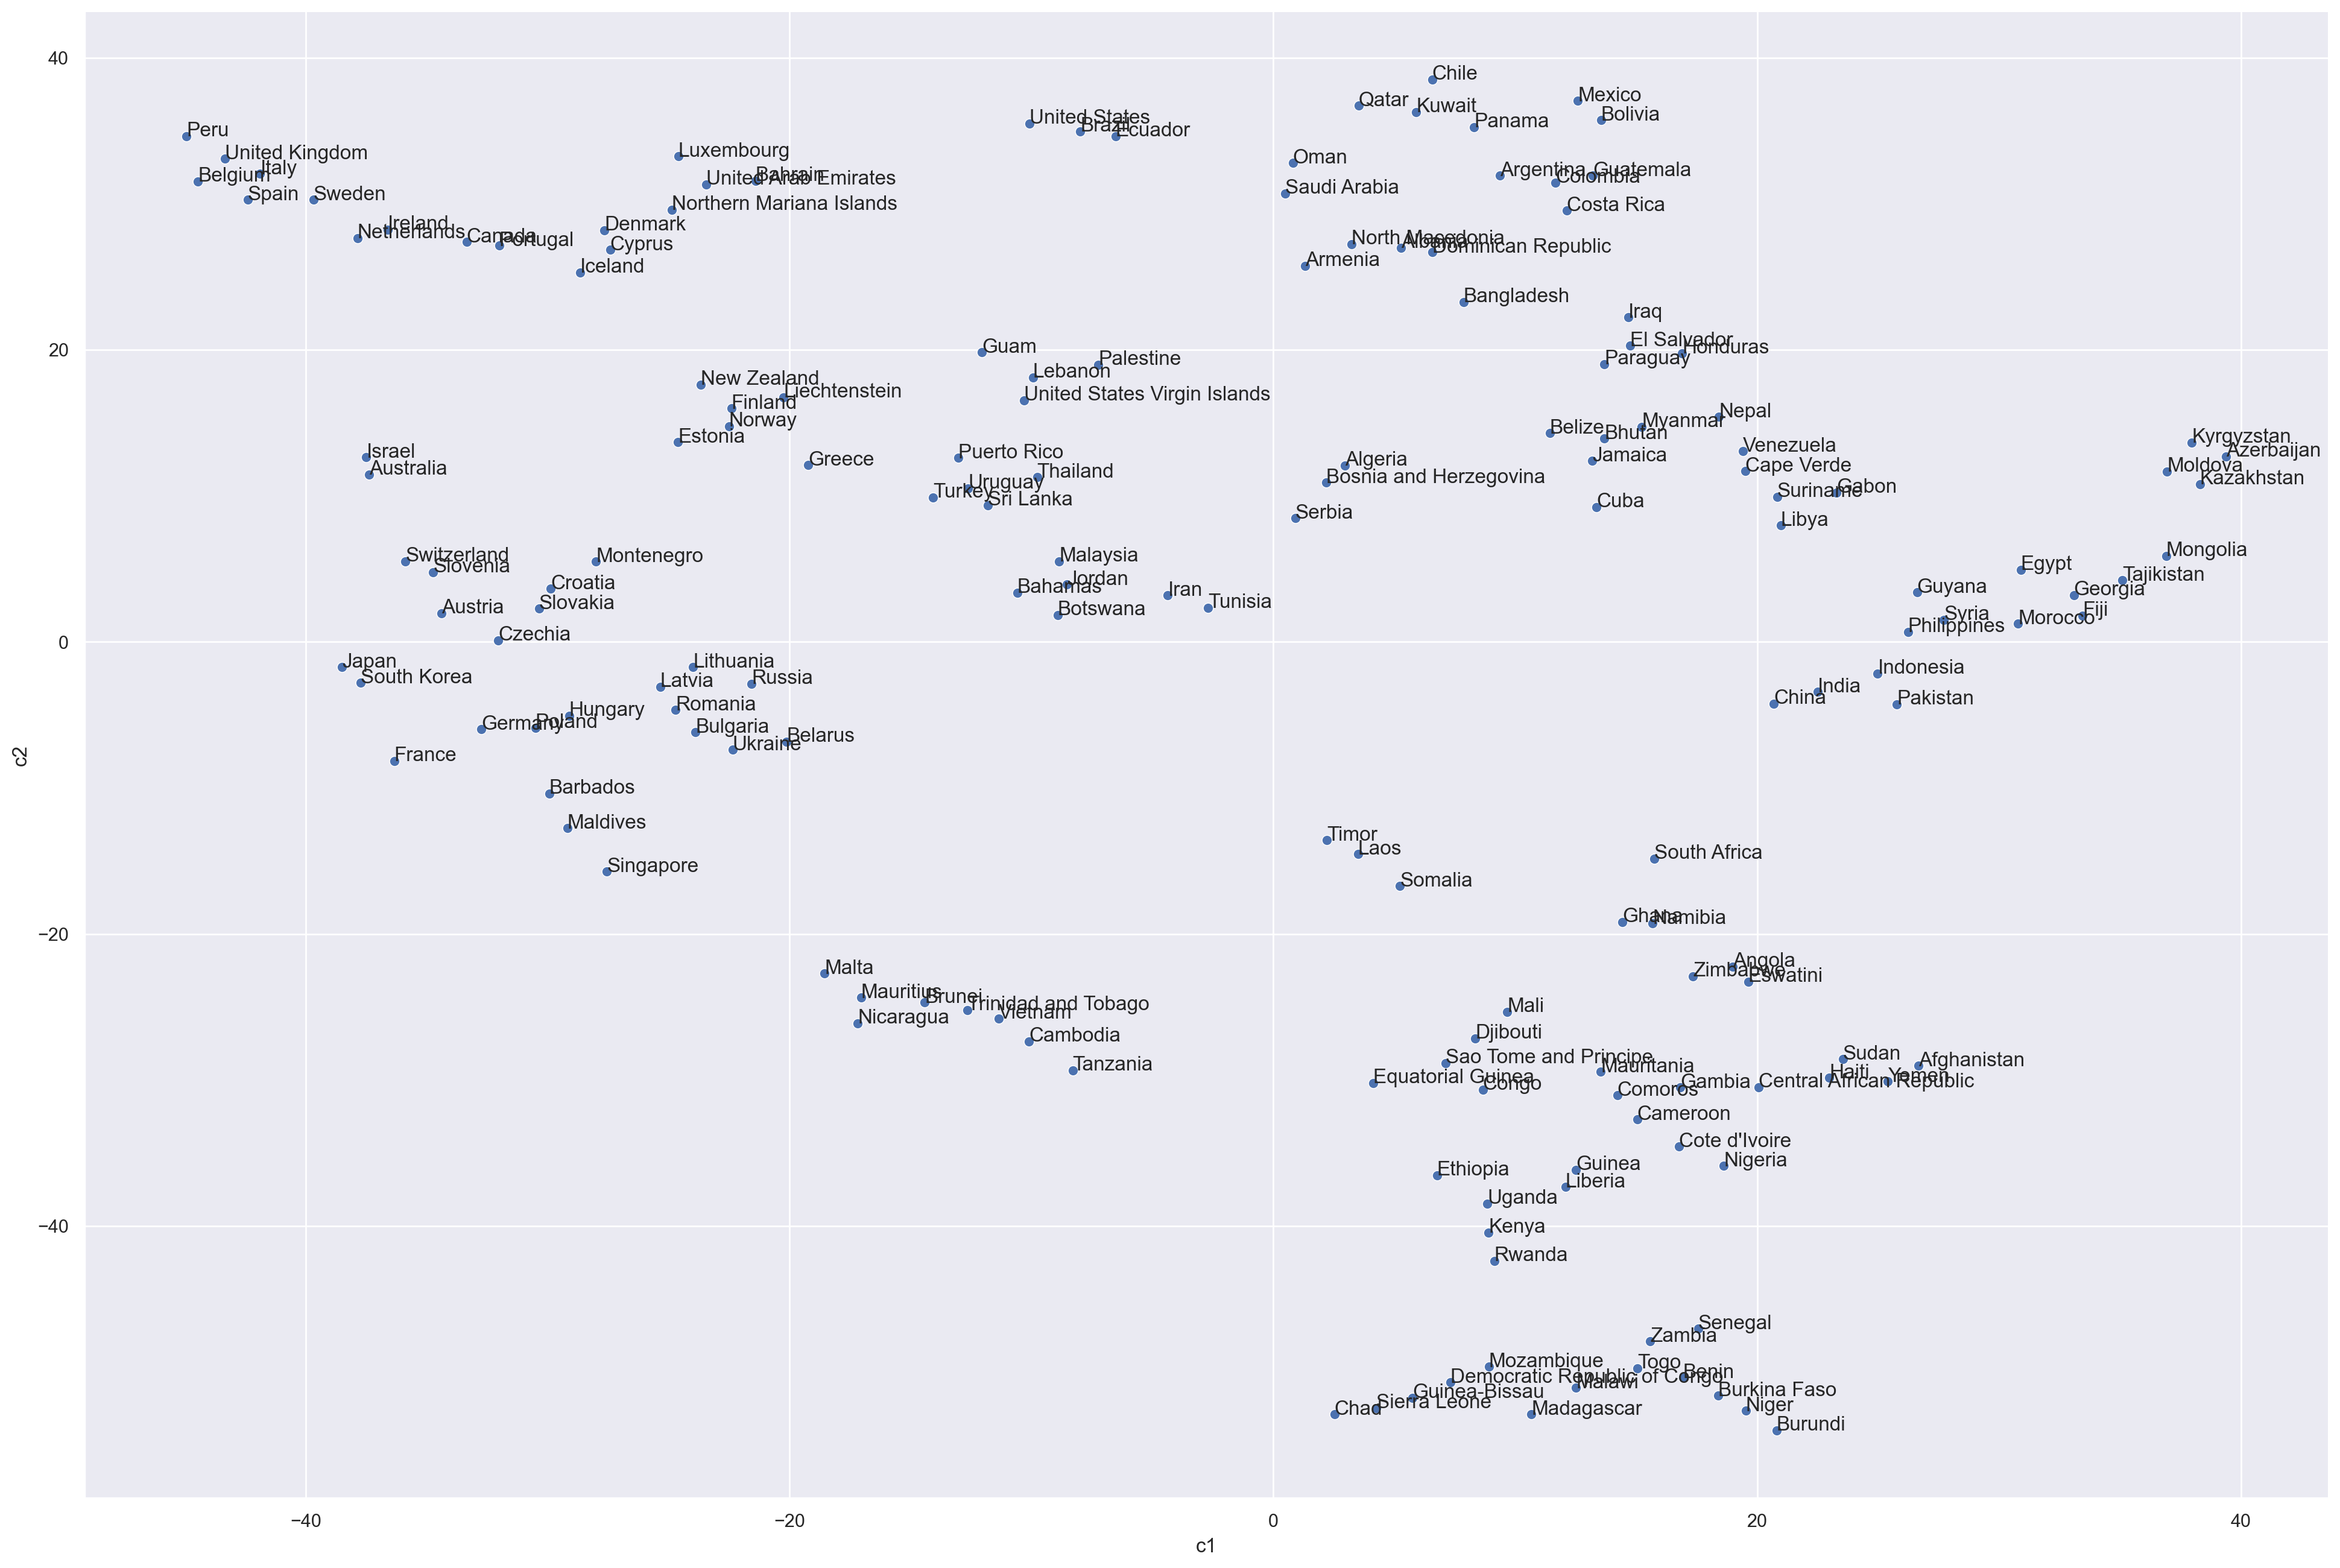

In [24]:
from sklearn.manifold import TSNE

tsne_perp_5 = TSNE(
    n_components=2, 
    learning_rate='auto', 
    init='random', 
    perplexity=5, 
    random_state=99
)

tcs = tsne_perp_5.fit_transform(df_loc)
# construct the data frame
tcs = pd.DataFrame(tcs,columns=['c1','c2'])
tcs.index = df_loc.index

plot_components(tcs,'c1','c2')
plot_components_plotly(tcs,'c1','c2')

# GMM Using BIC

In [25]:
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import GridSearchCV


# this is your scoring function for Grid Search
def gmm_bic_score(estimator, X):
    """Callable to pass to GridSearchCV that will use the BIC score."""
    # Make it negative since GridSearchCV expects a score to maximize
    return -estimator.bic(X)

# this is the parameters, of which the Grid Search 
# tries all possible combinations... 
# e.g. full+1component, full+2, ... full+7, diag+1, diag+2... 
param_grid = {
    "n_components": range(2, 7),
    "covariance_type": ["spherical", "tied", "diag", "full"],
}

estimator = GaussianMixture()

# docs at
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
grid_search = GridSearchCV(
    estimator, param_grid, scoring=gmm_bic_score
)
grid_search.fit(tcs)

GridSearchCV(estimator=GaussianMixture(),
             param_grid={'covariance_type': ['spherical', 'tied', 'diag',
                                             'full'],
                         'n_components': range(2, 7)},
             scoring=<function gmm_bic_score at 0x169c4eaf0>)

In [26]:
df_bic = pd.DataFrame(grid_search.cv_results_)[
    ["param_n_components", "param_covariance_type", "mean_test_score"]
]
df_bic["mean_test_score"] = -df_bic["mean_test_score"]
df_bic = df_bic.rename(
    columns={
        "param_n_components": "Number of components",
        "param_covariance_type": "Type of covariance",
        "mean_test_score": "BIC score",
    }
)
df_bic.sort_values(by="BIC score").head()

Number of components Type of covariance   BIC score
0                     2          spherical  642.961680
10                    2               diag  644.142962
6                     3               tied  646.901525
5                     2               tied  651.249699
1                     3          spherical  651.332803

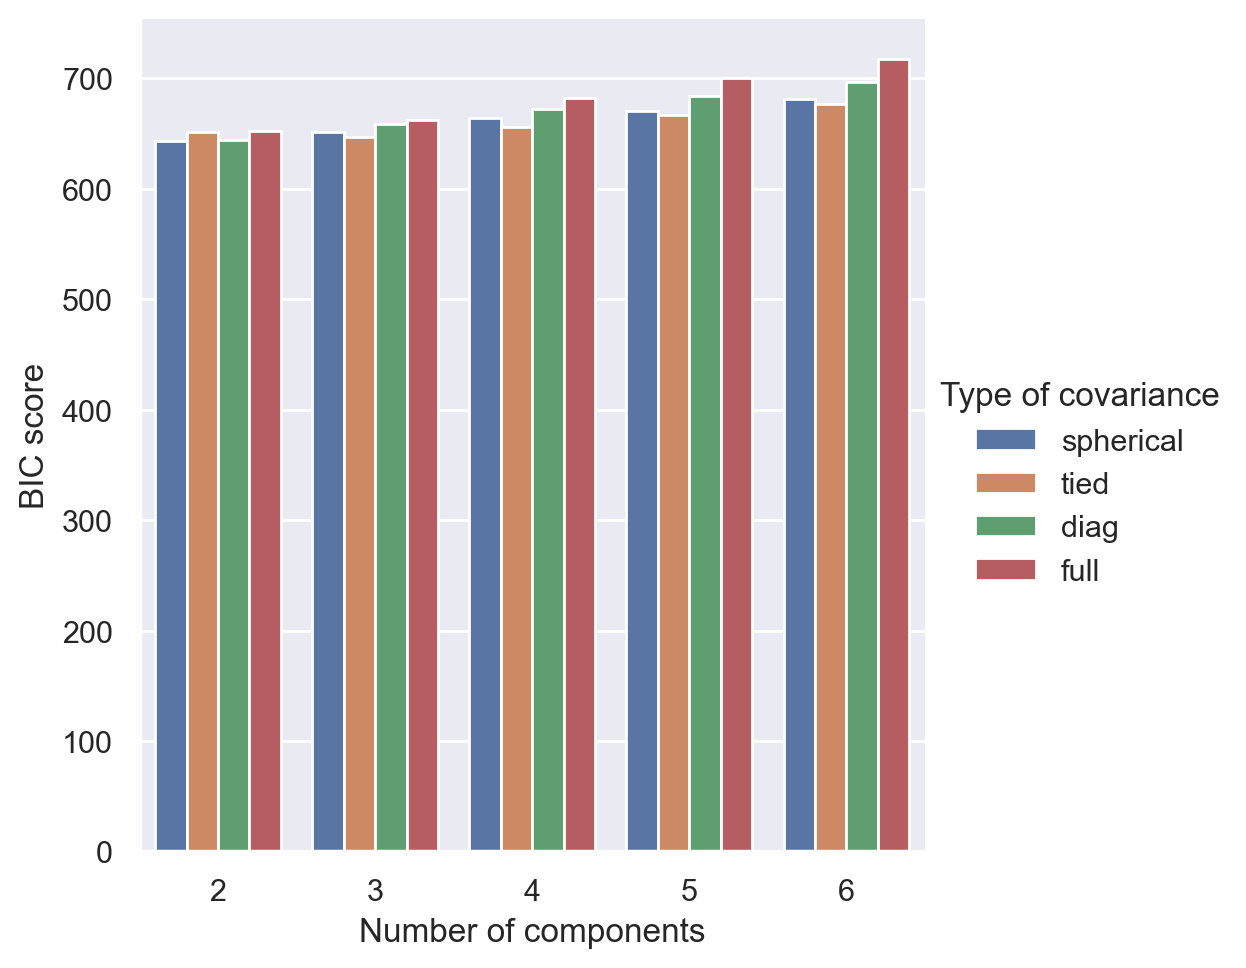

In [27]:
sns.catplot(
    data=df_bic,
    kind="bar",
    x="Number of components",
    y="BIC score",
    hue="Type of covariance",
)
plt.show()

In [28]:
def plot_gmm(gmm, X, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='rainbow')
    ax.axis('equal')
    w_factor = 0.2 / gmm.weights_.max()
    
    if gmm.covariance_type=='diag':
        fullc = np.array([ np.diag(x) for x in gmm.covariances_])
    elif gmm.covariance_type=='spherical':
        fullc = np.array([ np.diag([x, x]) for x in gmm.covariances_])
    elif gmm.covariance_type=='tied':
        fullc = np.array( gmm.n_components*[gmm.covariances_])
    elif gmm.covariance_type=='full':
        fullc = gmm.covariances_
    else:
        raise NotImplemented
        
    for pos, covar, w in zip(gmm.means_, fullc, gmm.weights_):
        alph = np.max([w*w_factor, 0.05])
        draw_ellipse(pos, covar, ax=ax, alpha=alph)

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle=angle, **kwargs))

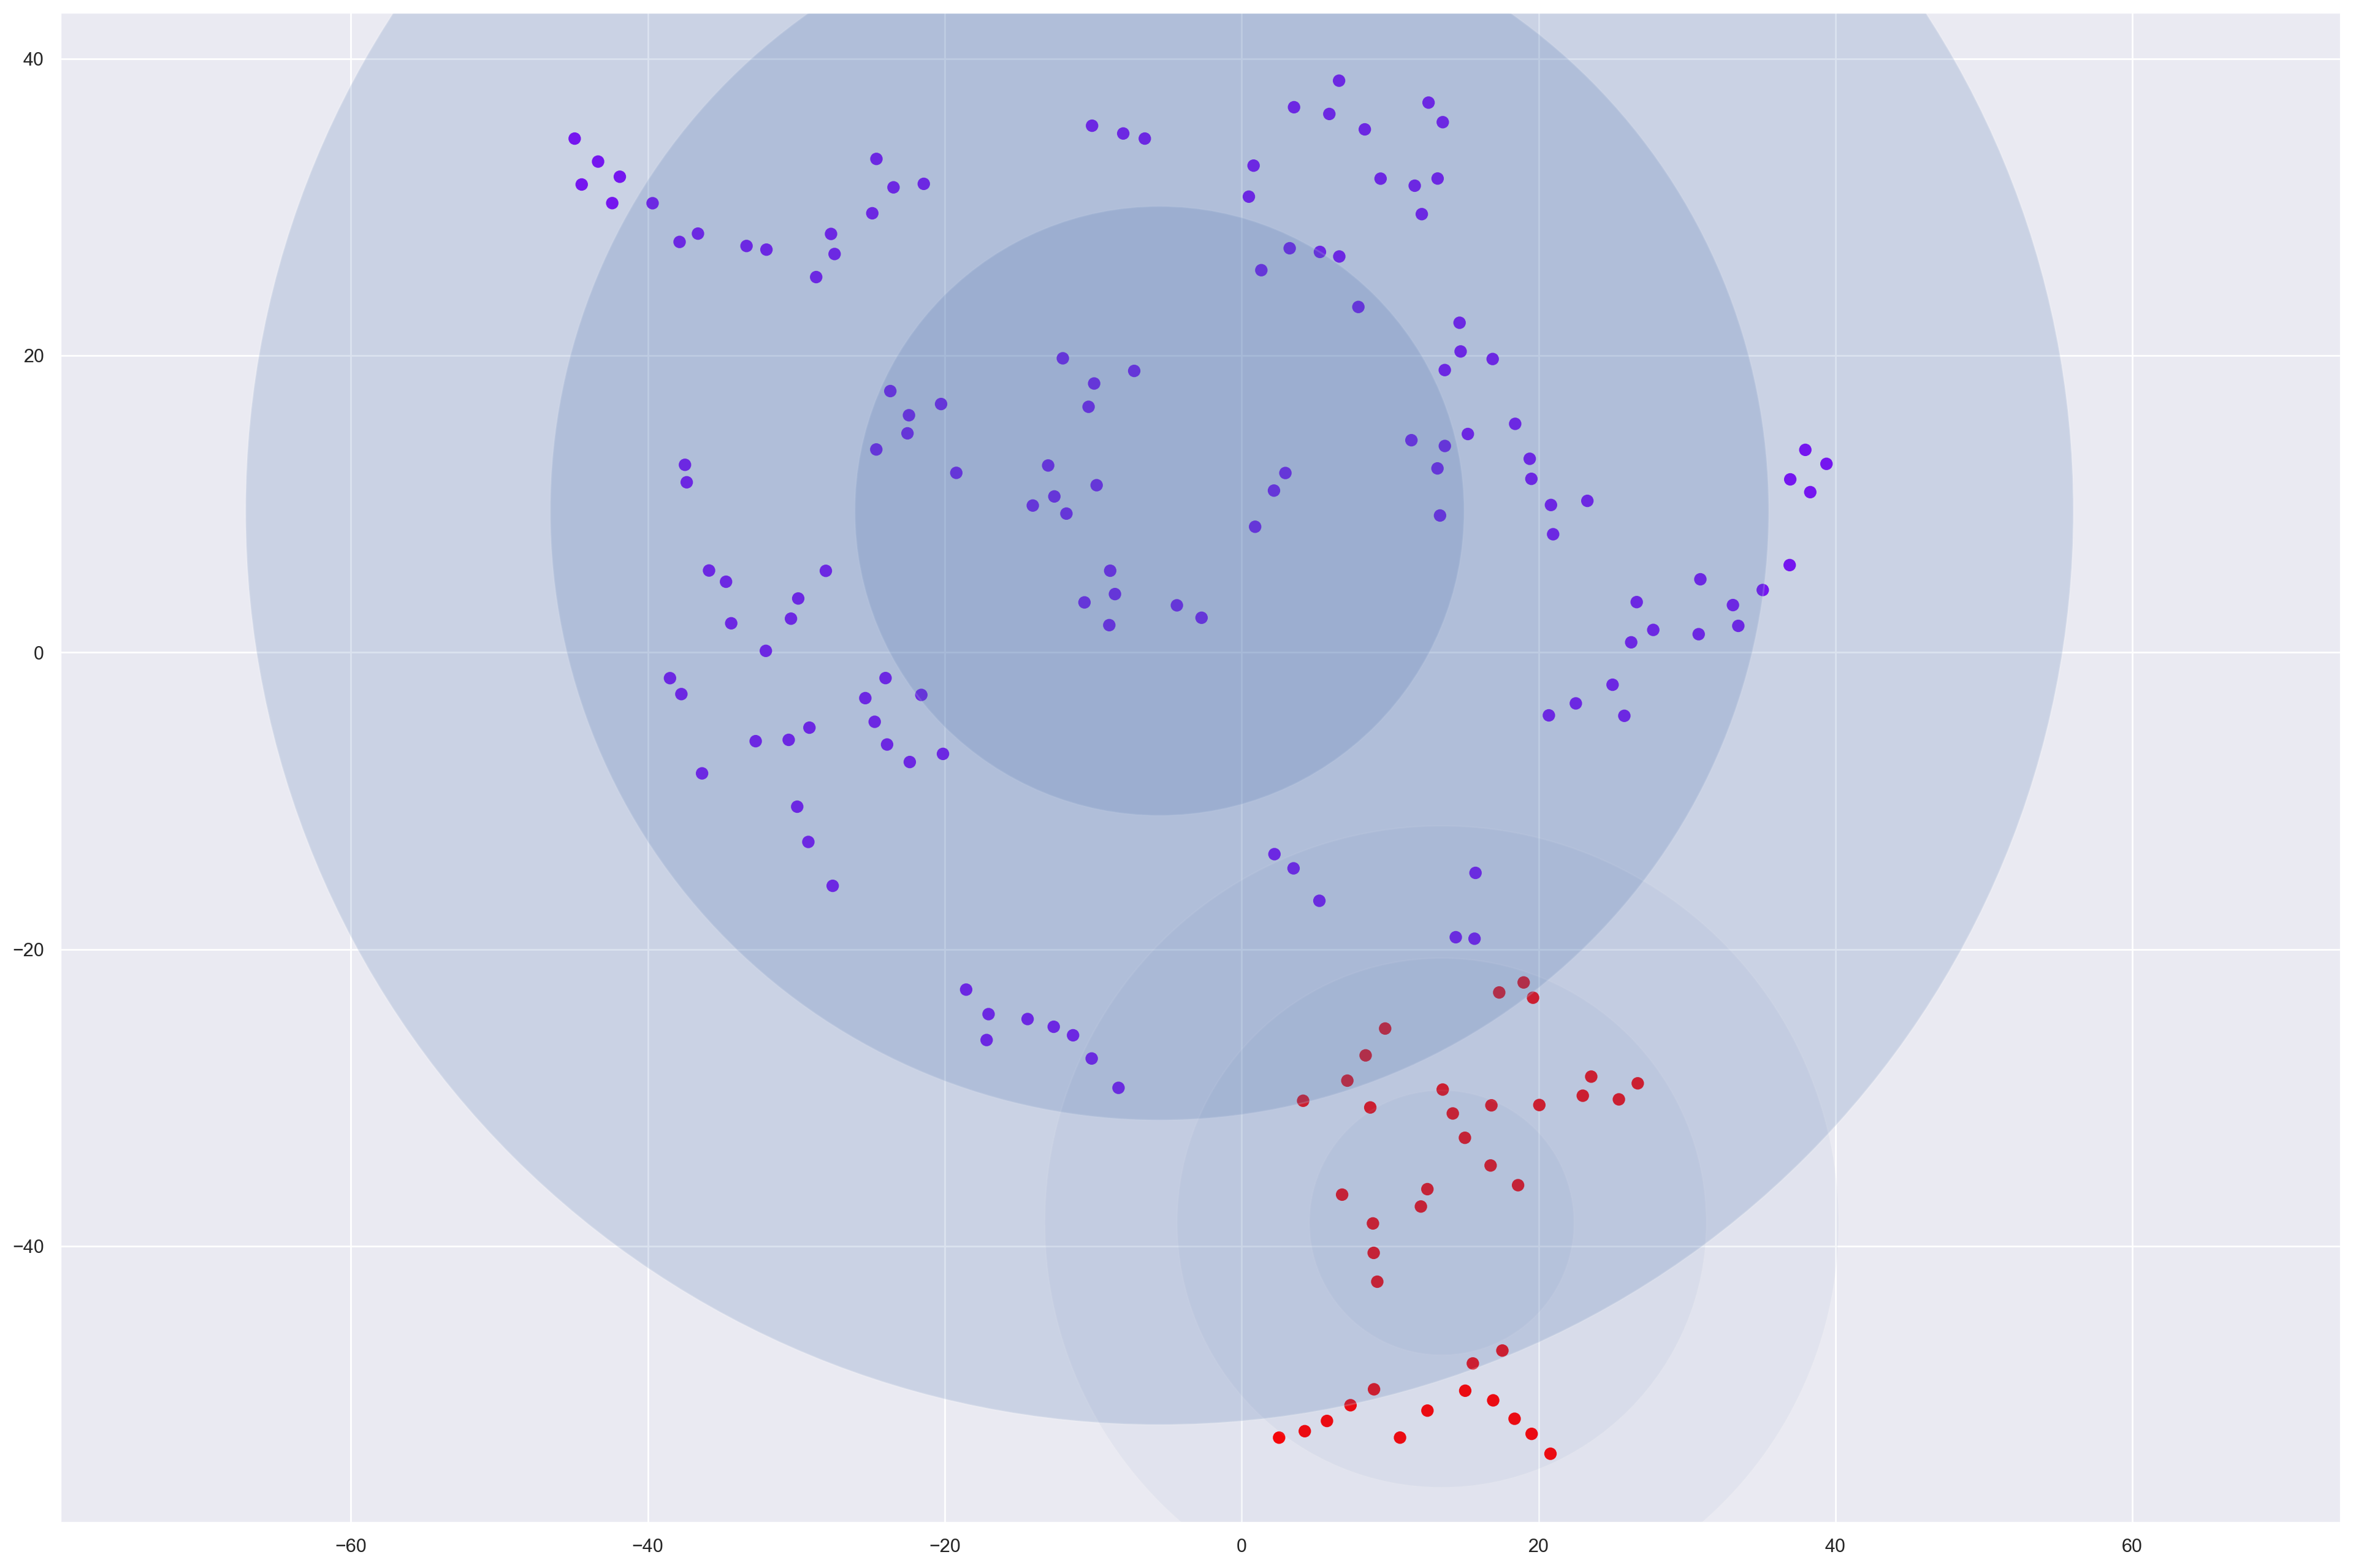

In [29]:
X = np.array(tcs)
plot_gmm(grid_search.best_estimator_, X)

In [30]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [52]:
def super_fun(super_df, super_date):
    # Cleaning
    df = normalize_columns_zscore(clean_data_for_date(super_df, super_date)).fillna(0)

    # t-SNE
    tsne_perp_5 = TSNE(
        n_components=2, 
        learning_rate='auto', 
        init='random', 
        perplexity=5, 
        random_state=99
    )
    tcs = tsne_perp_5.fit_transform(df)
    # construct the data frame
    tcs = pd.DataFrame(tcs,columns=['c1','c2'])
    tcs.index = df.index
    plot_components_plotly(tcs,'c1','c2')
    plot_components(tcs,'c1','c2')

    # GMM
    estimator = GaussianMixture()

    grid_search = GridSearchCV(
        estimator, param_grid, scoring=gmm_bic_score
    )
    grid_search.fit(tcs)
    plot_gmm(grid_search.best_estimator_, np.array(tcs))

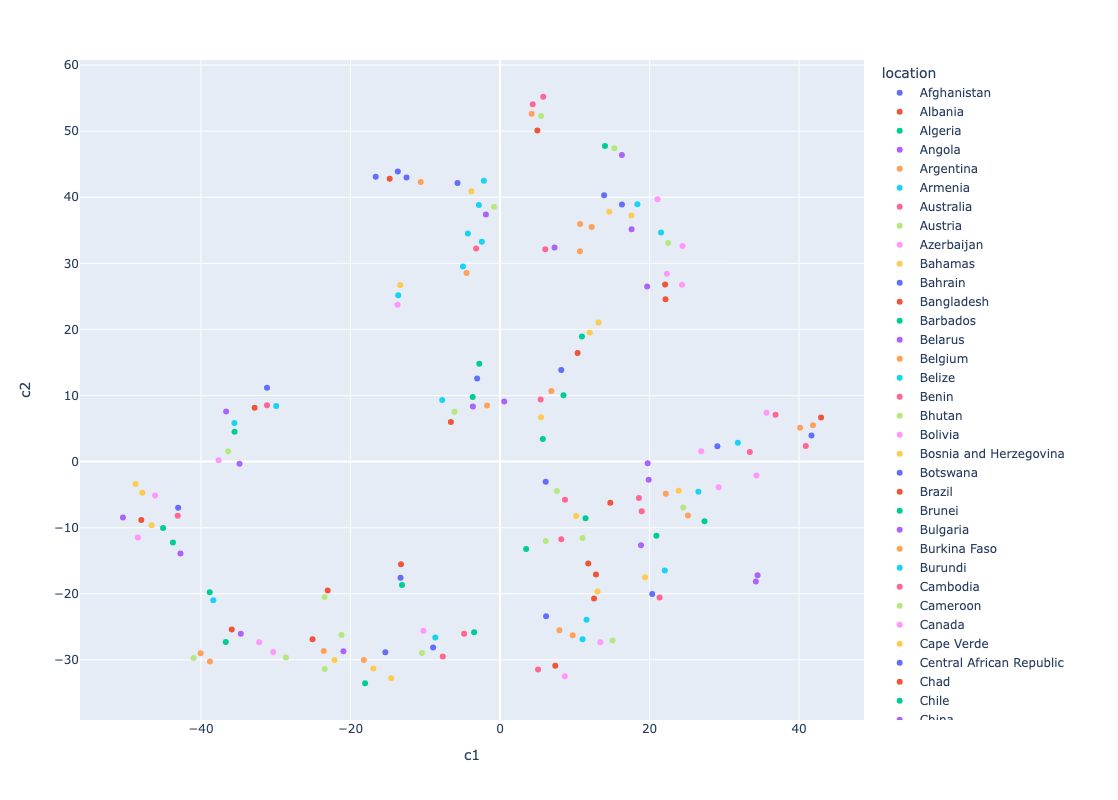

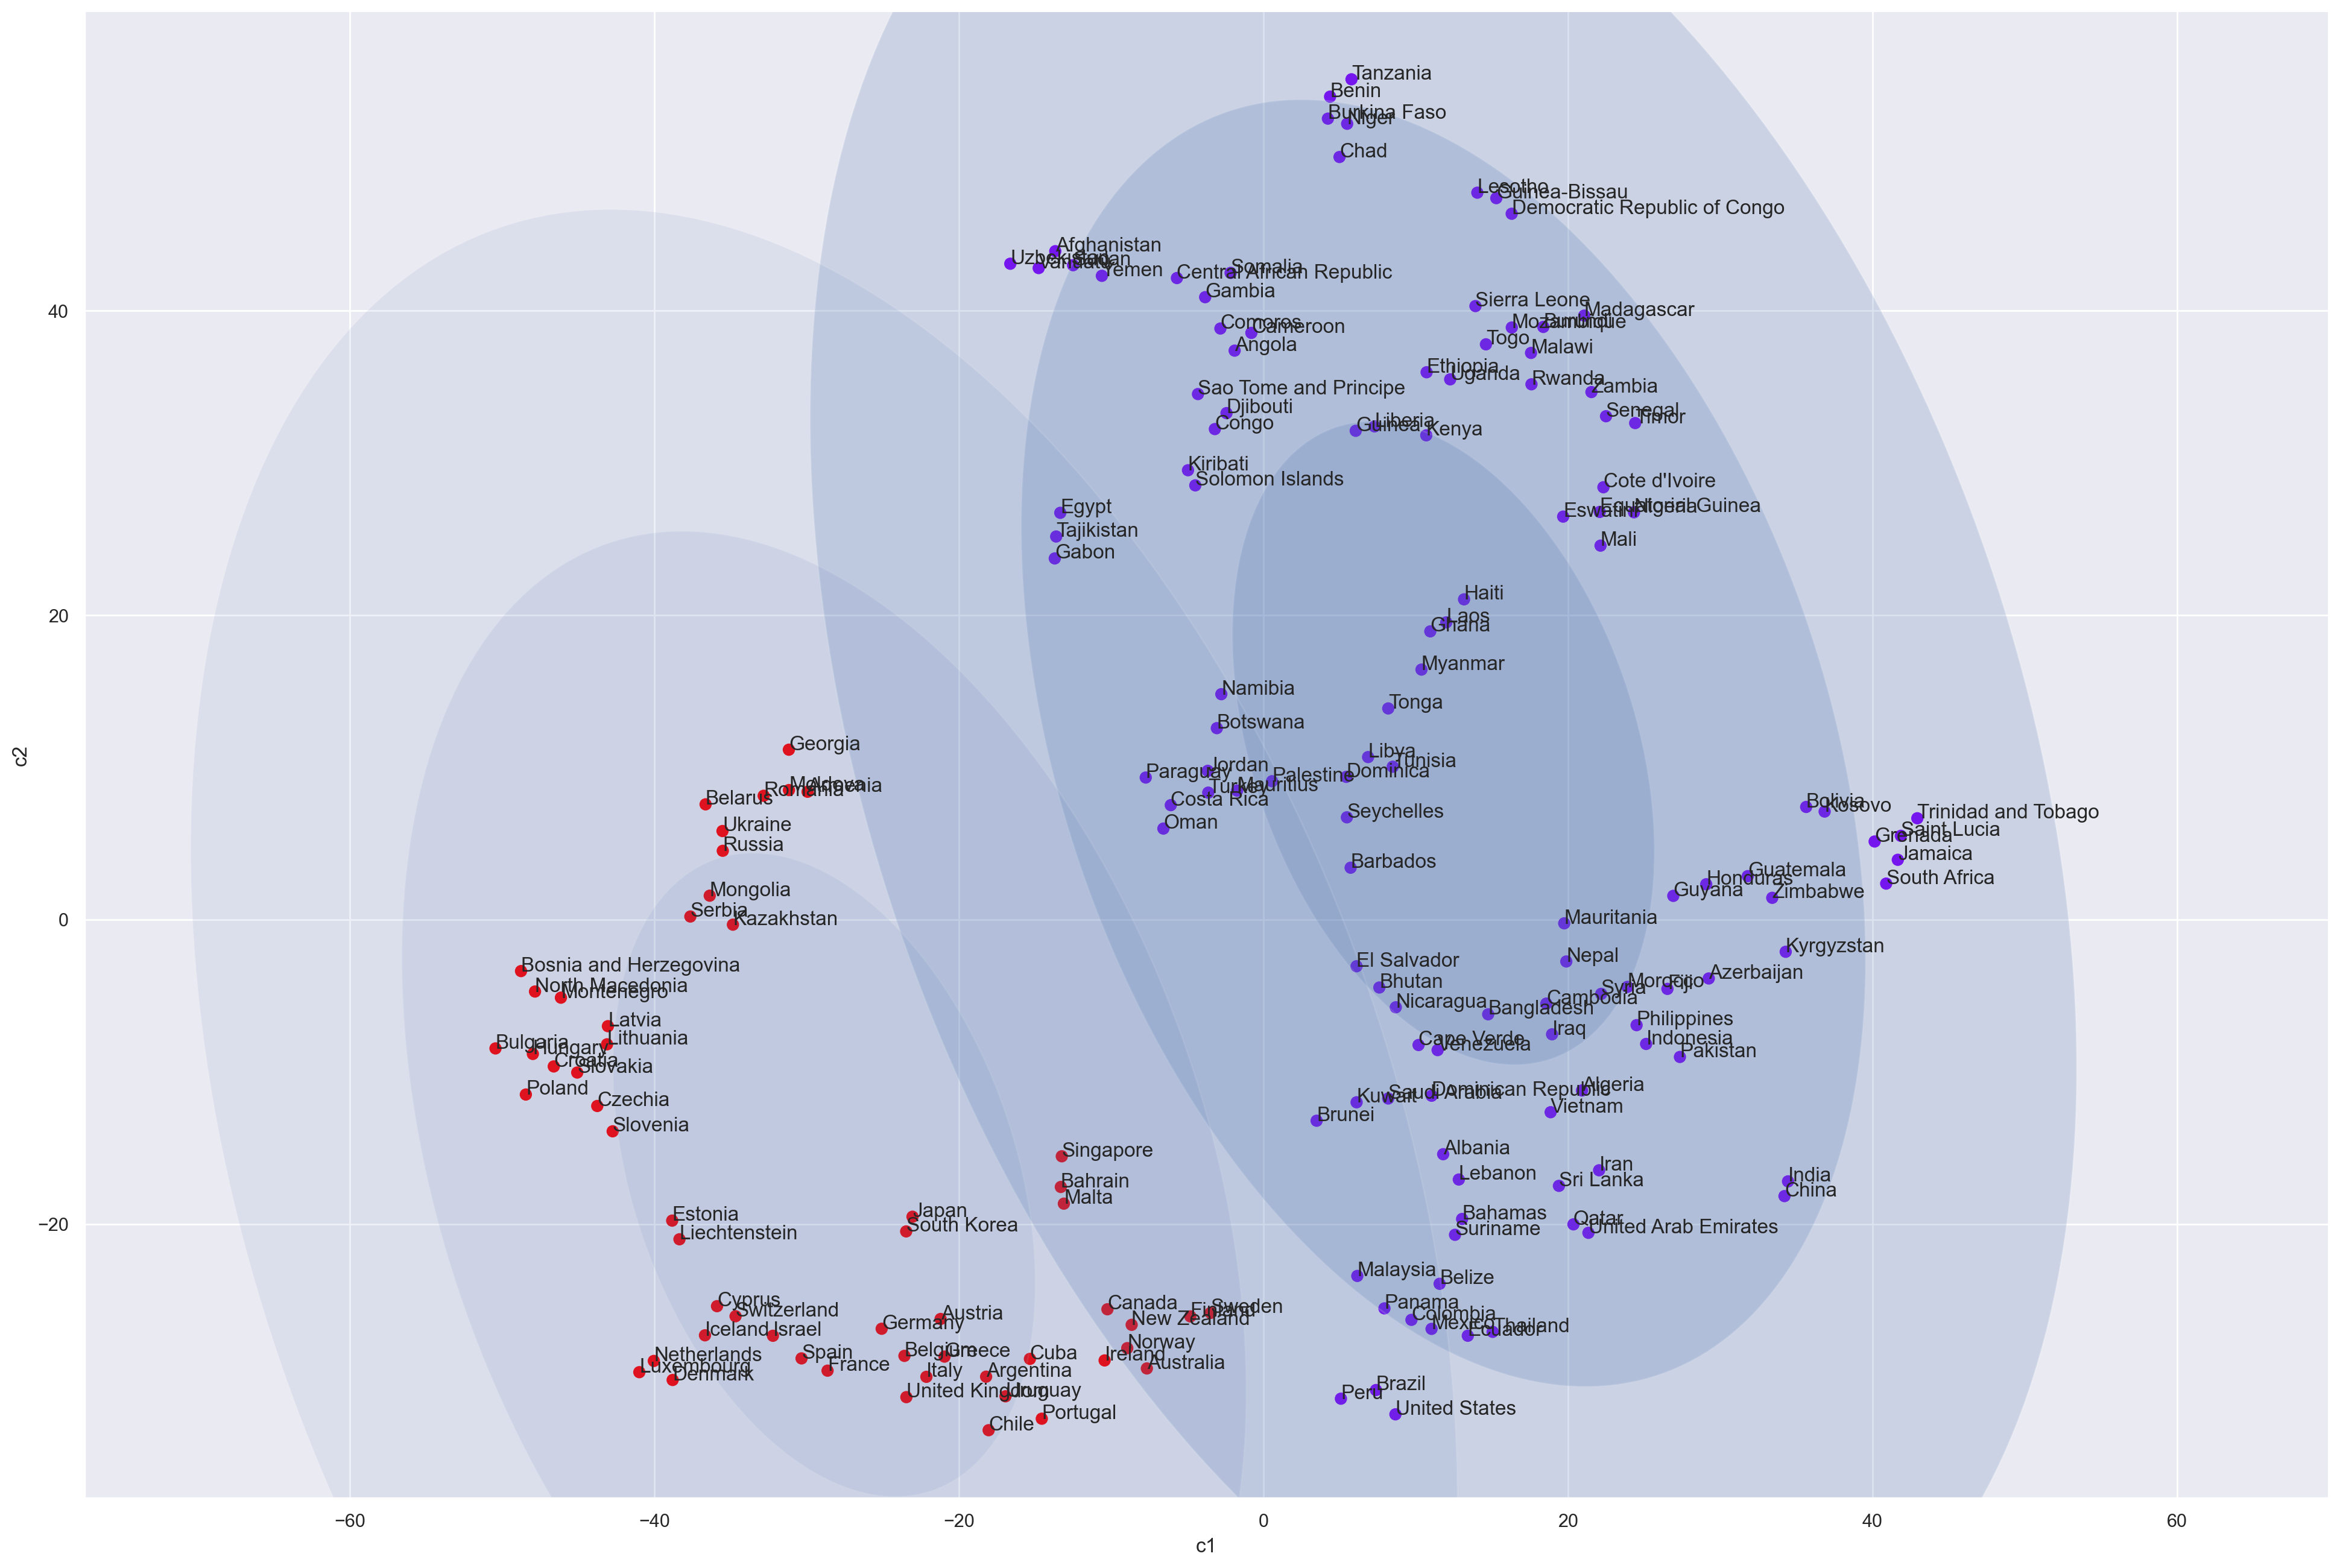

In [53]:
super_fun(df, '2022-07-01')

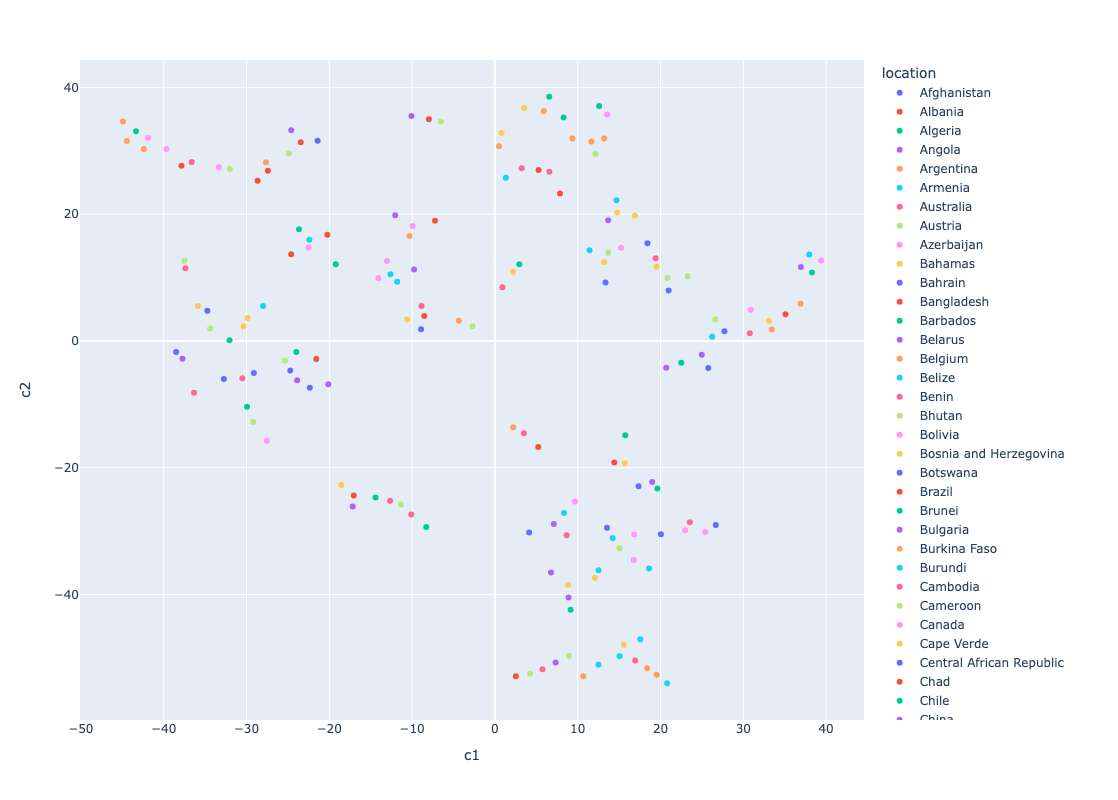

In [ ]:
super_fun(df, '2020-07-01')

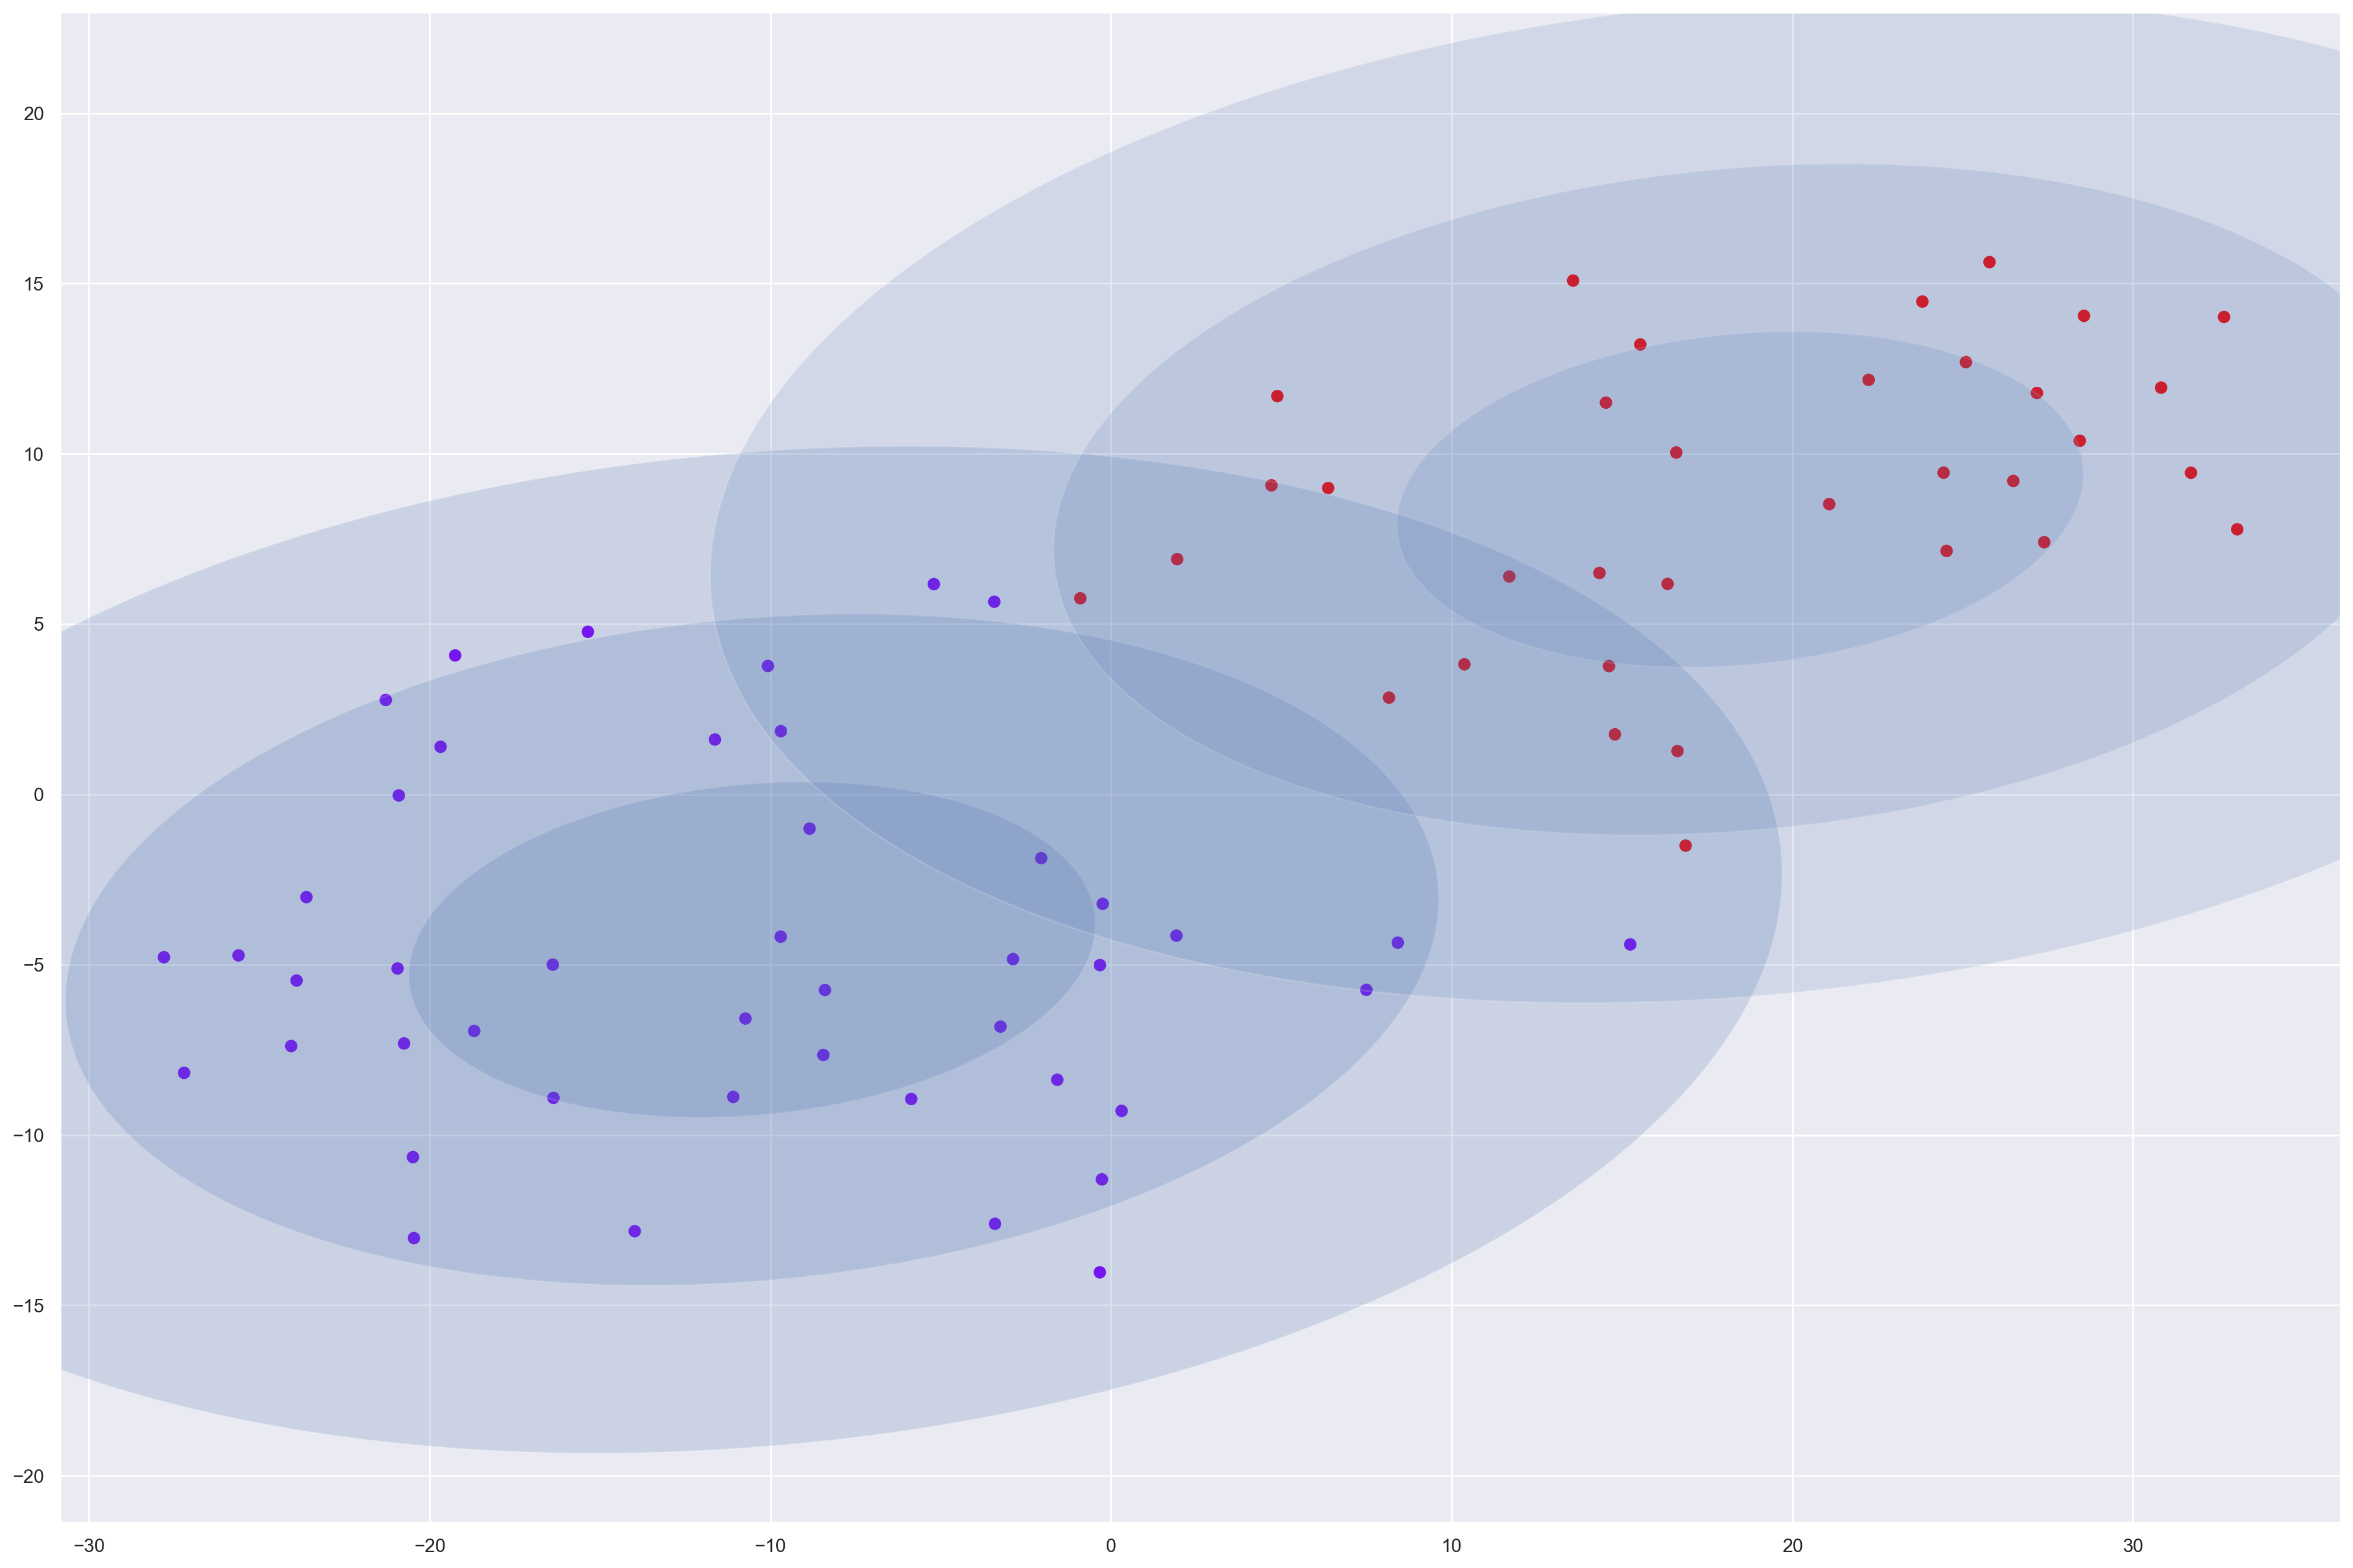

In [46]:
super_fun(df, '2023-09-01')